In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

In [3]:
df=pd.read_csv('2010.csv',encoding='utf-8')
for i in df['가사']:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[('내', 145), ('you', 109), ('I', 86), ('it', 86), ('난', 78), ('uh', 74), ('change', 68), ('me', 66), ('oh', 65), ('yeah', 63), ('나를', 61), ('날', 55), ('다', 55), ('너를', 52), ('나', 50), ('너', 49), ('나는', 47), ('up', 47), ('Oh', 46), ('사랑해', 45), ('wake', 45), ('내가', 44), ('널', 44), ('back', 42), ('그', 39), ('모두', 38), ('넌', 38), ('U', 38), ('삐리빠빠', 36), ('Go', 35)]


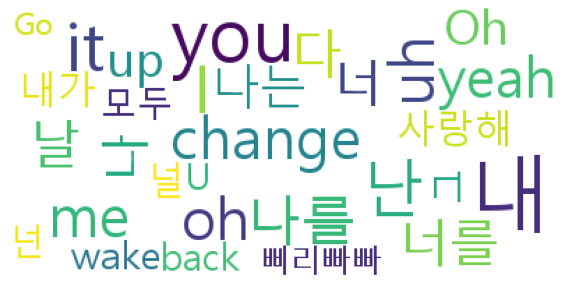

In [4]:


result = []
for gasa in df['가사']:  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
    # 특수문자 제거
    special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
    for char in special_chr:
        gasa = str(gasa).replace(char, " " )

    # 공백을 기준으로 문자열 나누기
    temp = gasa.split( " " )    # 공백으로 나누기
    for _str in temp:   # 반복문을 이용하여서 단어 하나씩 꺼내어 본다.
        if _str != "":  # 공백("")이 아닐 경우에만 해당 조건문을 수행한다.
            result.append( _str )    # 최종적으로 result 변수에 분류된 가사들을 넣는다.




# open으로 txt파일을 열고 read()를 이용하여 읽는다.
#     text = open('test.txt', encoding='utf-8').read()
#     okt = Okt() # Open Korean Text 객체 생성

#     # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
#     sentences_tag = []
#     sentences_tag = okt.pos(text)

#     noun_adj_list = []
#     # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
#     for word, tag in sentences_tag:
#         if tag in ['Noun' , 'Adjective']:
#             noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(result)
tags = counts.most_common(30)

print(tags)
# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

[('내', 145), ('you', 109), ('I', 86), ('it', 86), ('난', 78), ('uh', 74), ('change', 68), ('me', 66), ('oh', 65), ('yeah', 63), ('나를', 61), ('날', 55), ('다', 55), ('너를', 52), ('나', 50), ('너', 49), ('나는', 47), ('up', 47), ('Oh', 46), ('사랑해', 45), ('wake', 45), ('내가', 44), ('널', 44), ('back', 42), ('그', 39), ('모두', 38), ('넌', 38), ('U', 38), ('삐리빠빠', 36), ('Go', 35), ('말', 34), ('Knock', 34), ('더', 33), ('이', 33), ('the', 33), ('나의', 32), ('Ah', 32), ('왜', 31), ('또', 31), ('너의', 31), ('A-ha', 30), ('너무', 29), ('so', 29), ('be', 29), ('Yeah', 29), ('니가', 29), ('다시', 29), ('한', 27), ('Running', 27), ('Down', 27)]


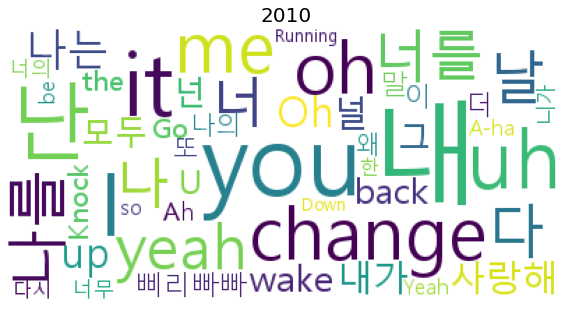

[('내', 128), ('난', 123), ('I', 116), ('oh', 93), ('Oh', 92), ('넌', 77), ('Hot', 75), ('너', 74), ('날', 71), ('lonely', 63), ('you', 61), ('널', 61), ('내가', 60), ('Boy', 60), ('나를', 58), ('나', 58), ('me', 58), ('다', 57), ('m', 57), ('baby', 56), ('it', 55), ('go', 51), ('더', 44), ('너를', 44), ('너무', 41), ('the', 41), ('like', 39), ('거야', 39), ('t', 38), ('boy', 38), ('나는', 37), ('몰라', 36), ('수', 36), ('정말', 36), ('없어', 36), ('Baby', 36), ('왜', 35), ('Ah', 35), ('네', 35), ('그', 35), ('사랑해', 34), ('나의', 34), ('Fiction', 33), ('out', 32), ('Bubble', 32), ('모두', 31), ('니가', 30), ('또', 29), ('좀', 29), ('너의', 29)]


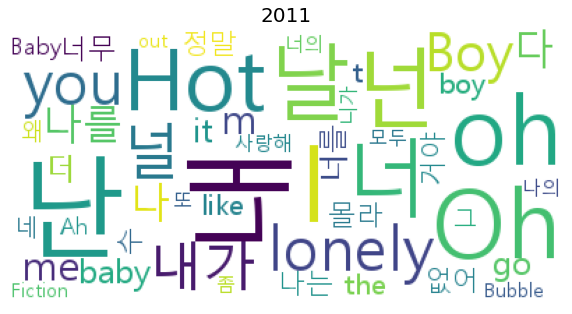

[('I', 144), ('you', 111), ('난', 110), ('내', 105), ('널', 88), ('그', 77), ('너무', 77), ('니', 68), ('m', 65), ('baby', 56), ('이', 55), ('쩔어', 54), ('내가', 50), ('나를', 48), ('날', 48), ('t', 48), ('너', 45), ('넌', 45), ('또', 45), ('my', 43), ('나', 42), ('너를', 42), ('touch', 42), ('너의', 39), ('that', 39), ('수', 36), ('love', 36), ('나는', 35), ('know', 35), ('더', 35), ('다', 34), ('니가', 34), ('girl', 32), ('re', 31), ('바로', 30), ('You', 30), ('네', 30), ('말', 30), ('me', 28), ('그래', 27), ('왜', 27), ('a', 27), ('이게', 27), ('don', 26), ('다시', 25), ('한', 25), ('우리', 25), ('lay', 24), ('Talk', 24), ('뜨거', 24)]


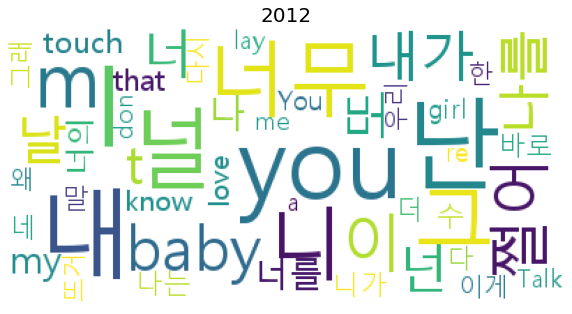

[('내', 165), ('I', 154), ('난', 127), ('Ooh', 103), ('me', 90), ('나', 80), ('널', 79), ('m', 76), ('to', 67), ('넌', 64), ('you', 64), ('없어', 60), ('더', 59), ('날', 58), ('s', 57), ('네', 55), ('oh', 55), ('a', 52), ('그', 51), ('너', 49), ('it', 48), ('예', 45), ('What', 44), ('You', 43), ('love', 41), ('내가', 39), ('이', 39), ('다', 38), ('한', 38), ('수', 38), ('Oh', 38), ('너의', 37), ('왜', 37), ('으르렁', 36), ('boy', 36), ('그대', 36), ('Pum', 36), ('오늘', 35), ('the', 35), ('내게', 34), ('너를', 33), ('Everybody', 32), ('Ah', 32), ('sorry', 32), ('점핑', 30), ('one', 30), ('name', 30), ('걸', 29), ('사랑이', 29), ('나를', 29)]


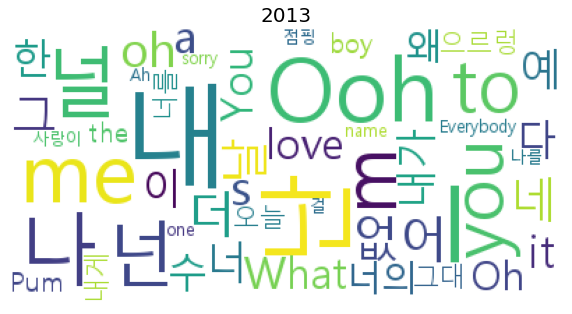

[('내', 138), ('eh', 87), ('난', 85), ('널', 80), ('나', 78), ('너를', 77), ('너', 76), ('날', 74), ('you', 64), ('그', 63), ('더', 55), ('넌', 55), ('너의', 54), ('Mr', 54), ('나의', 52), ('love', 52), ('내가', 50), ('I', 47), ('수', 46), ('이', 46), ('왜', 45), ('너무', 44), ('my', 42), ('또', 41), ('우리', 40), ('다', 38), ('나를', 37), ('s', 36), ('너와', 35), ('지금', 33), ('baby', 31), ('좀', 29), ('네', 29), ('oh', 29), ('것', 28), ('모든', 28), ('눈을', 27), ('내게', 27), ('니가', 27), ('한', 26), ('봐', 26), ('건', 26), ('없어', 26), ('me', 26), ('나는', 25), ('말', 25), ('이건', 25), ('dat', 25), ('네가', 24), ('사랑', 24)]


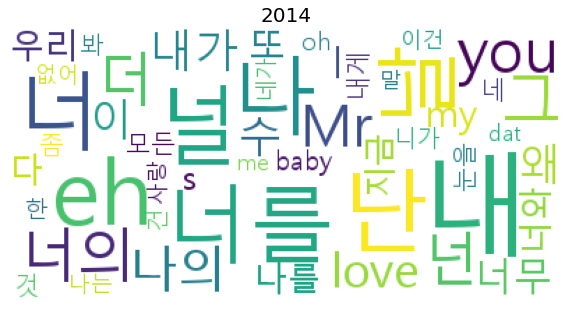

[('you', 141), ('I', 132), ('난', 115), ('내', 110), ('me', 101), ('날', 81), ('it', 79), ('더', 70), ('다', 64), ('그', 63), ('나', 62), ('넌', 58), ('that', 55), ('booty', 55), ('또', 54), ('oh', 54), ('너', 53), ('널', 51), ('s', 47), ('없어', 46), ('너무', 46), ('이', 45), ('좀', 44), ('아예', 44), ('미친', 44), ('해', 43), ('baby', 43), ('한', 42), ('Shake', 41), ('girl', 40), ('수', 37), ('내가', 37), ('돼', 37), ('and', 36), ('네', 35), ('나를', 35), ('왜', 34), ('A', 34), ('You', 33), ('내게', 32), ('La', 32), ('안', 31), ('다시', 31), ('너의', 31), ('Yeah', 31), ('나도', 29), ('Baby', 29), ('가', 29), ('Let', 28), ('get', 28)]


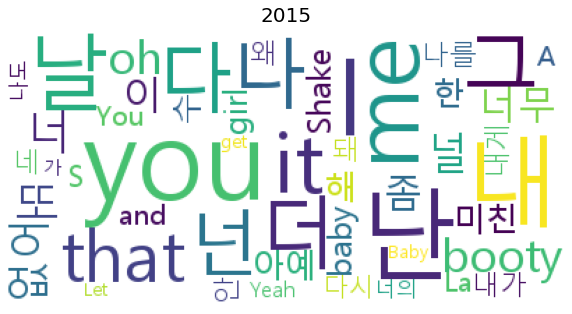

[('내', 163), ('I', 127), ('널', 104), ('난', 97), ('ooh', 89), ('you', 87), ('그', 77), ('na', 76), ('넌', 71), ('수', 69), ('내가', 65), ('너의', 65), ('날', 64), ('다', 55), ('더', 54), ('m', 52), ('나', 48), ('너', 48), ('me', 47), ('많이', 47), ('왜', 45), ('않아', 39), ('네', 39), ('걸', 38), ('게', 38), ('like', 37), ('a', 35), ('이', 35), ('나를', 34), ('없는', 34), ('so', 34), ('없어', 32), ('t', 32), ('la', 32), ('좀', 31), ('안', 31), ('You', 30), ('말', 30), ('my', 29), ('Shut', 28), ('자꾸', 27), ('너무', 27), ('있어', 27), ('우리', 27), ('나는', 27), ('baby', 26), ('해', 26), ('다시', 26), ('거야', 25), ('모든', 25)]


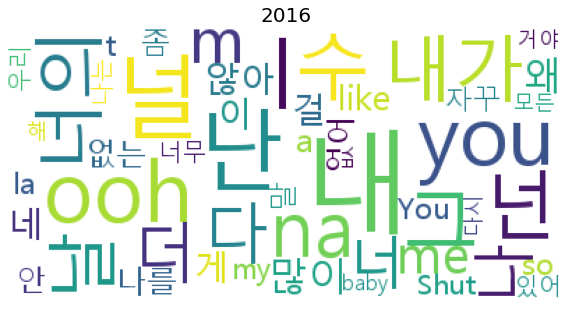

[('내', 136), ('I', 125), ('난', 102), ('knock', 102), ('널', 90), ('넌', 85), ('날', 78), ('그', 74), ('왜', 64), ('you', 63), ('이', 60), ('수', 60), ('나', 58), ('너의', 58), ('REALLY', 58), ('my', 55), ('rookie', 52), ('너를', 50), ('내가', 49), ('네', 49), ('다', 48), ('더', 45), ('같아', 44), ('것', 43), ('나를', 41), ('다시', 41), ('걸', 37), ('on', 37), ('또', 33), ('a', 33), ('m', 32), ('it', 32), ('않아', 32), ('Knock', 32), ('해', 31), ('안', 31), ('네가', 30), ('new', 30), ('너', 29), ('me', 29), ('우리', 28), ('나의', 28), ('거야', 28), ('정말', 28), ('t', 28), ('보내', 28), ('있어', 27), ('이렇게', 27), ('게', 27), ('모르겠다', 27)]


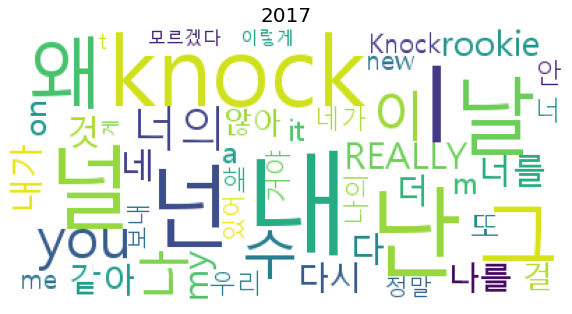

[('I', 206), ('내', 110), ('난', 89), ('you', 89), ('널', 85), ('날', 84), ('넌', 79), ('더', 77), ('it', 77), ('know', 74), ('love', 70), ('s', 69), ('해', 67), ('me', 66), ('이', 62), ('다', 58), ('수', 55), ('wanna', 52), ('t', 52), ('나', 51), ('the', 51), ('oh', 50), ('내가', 49), ('네', 49), ('그', 47), ('너를', 43), ('밤', 43), ('ah', 43), ('걸', 42), ('봐', 41), ('너의', 40), ('Love', 40), ('what', 39), ('너와', 37), ('ya', 37), ('night', 35), ('so', 34), ('나를', 33), ('없는', 33), ('거야', 33), ('네가', 31), ('그리고', 31), ('안', 30), ('또', 30), ('잘', 30), ('왜', 30), ('don', 30), ('나는', 29), ('다음', 29), ('것', 28)]


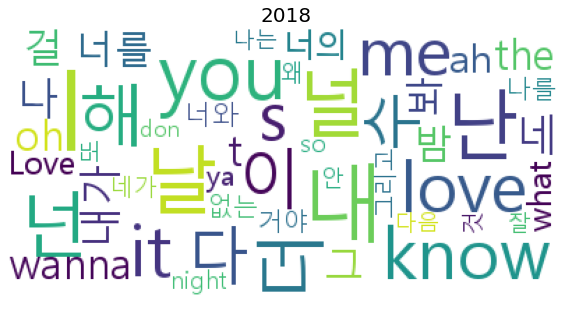

[('I', 106), ('내', 100), ('난', 86), ('나', 74), ('너를', 69), ('널', 67), ('수', 66), ('더', 60), ('이', 60), ('우리', 59), ('my', 58), ('twit', 56), ('you', 54), ('그', 53), ('내가', 52), ('날', 52), ('다', 51), ('네', 51), ('없는', 49), ('봐', 47), ('한', 44), ('넌', 42), ('나는', 40), ('네가', 40), ('it', 39), ('또', 38), ('m', 38), ('You', 37), ('fire', 37), ('지금', 33), ('걸', 32), ('me', 32), ('너는', 32), ('t', 32), ('너의', 31), ('up', 31), ('싶어', 30), ('이젠', 30), ('lo', 30), ('다시', 28), ('없어', 28), ('게', 27), ('왜', 26), ('너무', 26), ('don', 26), ('YES', 26), ('너', 25), ('모든', 25), ('해', 25), ('나의', 24)]


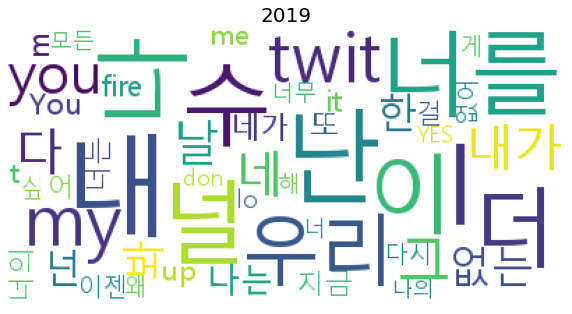

In [5]:
for i in range(10):
    df=pd.read_csv(f'{2010+i}.csv',encoding='utf-8')
    result = []
    for gasa in df['가사']:  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
        # 특수문자 제거
        special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
        for char in special_chr:
            gasa = str(gasa).replace(char, " " )

        # 공백을 기준으로 문자열 나누기
        temp = gasa.split( " " )    # 공백으로 나누기
        for _str in temp:   # 반복문을 이용하여서 단어 하나씩 꺼내어 본다.
            if _str != "":  # 공백("")이 아닐 경우에만 해당 조건문을 수행한다.
                result.append( _str )    # 최종적으로 result 변수에 분류된 가사들을 넣는다.
    
    counts = Counter(result)
    tags = counts.most_common(50)
    print(tags)

    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path, background_color="white", max_font_size=80)
    cloud = wc.generate_from_frequencies(dict(tags))
    
    plt.figure(figsize=(10, 8))
    plt.title(f'{2010+i}',fontsize=20)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

    

[('you', 141), ('oh', 111), ('it', 94), ('yeah', 94), ('me', 77), ('uh', 76), ('change', 68), ('나를', 61), ('up', 54), ('너를', 52), ('so', 52), ('love', 52), ('나는', 47), ('go', 46), ('사랑해', 45), ('wake', 45), ('내가', 44), ('ah', 44), ('back', 44), ('do', 39), ('can', 39), ('모두', 38), ('the', 36), ('삐리빠빠', 36), ('knock', 36), ('now', 34), ('be', 33), ('나의', 32), ('baby', 32), ('너의', 31), ('ya', 31), ('my', 30), ('a-ha', 30), ('너무', 29), ('니가', 29), ('다시', 29), ('down', 28), ('let', 27), ('running', 27), ('사랑', 26), ('없어', 26), ('hey', 25), ('그냥', 24), ('사람', 24), ('네가', 24), ('싶어', 24), ('right', 24), ('to', 24), ('않아', 24), ('hellow', 24)]


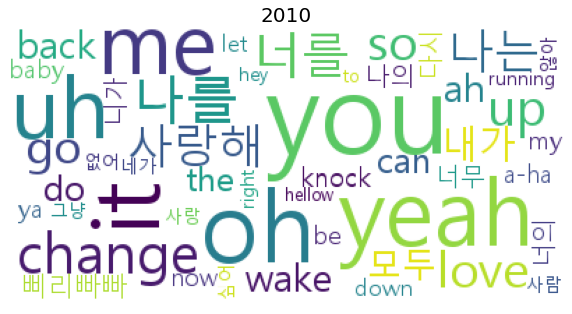

[('oh', 189), ('boy', 99), ('baby', 92), ('hot', 84), ('you', 76), ('me', 65), ('lonely', 63), ('내가', 60), ('나를', 58), ('it', 58), ('go', 53), ('my', 52), ('no', 45), ('너를', 44), ('너무', 41), ('the', 41), ('like', 40), ('거야', 39), ('나는', 37), ('몰라', 36), ('정말', 36), ('없어', 36), ('ah', 35), ('사랑해', 34), ('나의', 34), ('bubble', 34), ('in', 33), ('fiction', 33), ('out', 33), ('yeah', 32), ('모두', 31), ('hey', 31), ('니가', 30), ('너의', 29), ('제발', 28), ('black', 27), ('다시', 26), ('girl', 26), ('summer', 26), ('좋아', 25), ('don', 25), ('너는', 25), ('so', 25), ('back', 25), ('그런', 24), ('너와', 24), ('두밥', 23), ('say', 22), ('to', 22), ('shy', 22)]


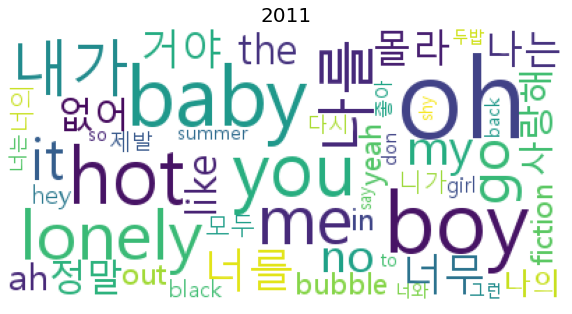

[('you', 141), ('너무', 77), ('baby', 67), ('쩔어', 54), ('내가', 50), ('my', 50), ('나를', 48), ('너를', 42), ('girl', 42), ('touch', 42), ('너의', 39), ('that', 39), ('me', 38), ('love', 37), ('don', 36), ('talk', 36), ('나는', 35), ('know', 35), ('니가', 34), ('oh', 32), ('re', 31), ('바로', 30), ('그래', 27), ('이게', 27), ('다시', 25), ('우리', 25), ('lay', 24), ('goodbye', 24), ('뜨거', 24), ('the', 23), ('내게', 23), ('one', 23), ('보고', 23), ('사랑', 23), ('나의', 22), ('day', 22), ('heart', 21), ('so', 20), ('only', 20), ('woo', 20), ('제발', 20), ('stop', 19), ('사랑하겠어', 19), ('그런', 18), ('babe', 18), ('강남스타일', 17), ('lady', 17), ('boy', 17), ('모든', 17), ('아름다운', 17)]


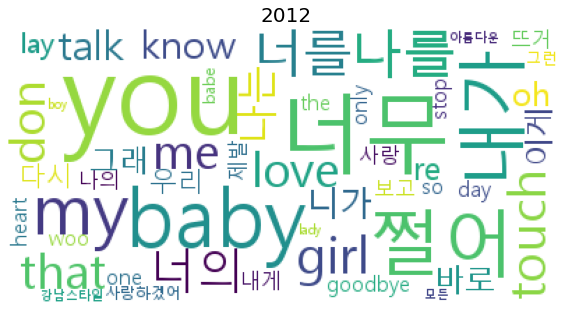

[('ooh', 109), ('you', 107), ('oh', 93), ('me', 91), ('to', 89), ('없어', 60), ('it', 60), ('what', 50), ('love', 49), ('the', 48), ('boy', 43), ('내가', 39), ('너의', 37), ('으르렁', 36), ('그대', 36), ('pum', 36), ('one', 35), ('오늘', 35), ('내게', 34), ('my', 33), ('너를', 33), ('sorry', 33), ('touch', 33), ('everybody', 32), ('ah', 32), ('점핑', 30), ('no', 30), ('do', 30), ('name', 30), ('사랑이', 29), ('get', 29), ('나를', 29), ('이렇게', 29), ('눈물', 29), ('니가', 29), ('bad', 29), ('now', 28), ('네가', 28), ('너무', 28), ('got', 28), ('뭐예요', 28), ('shot', 28), ('your', 27), ('goodbye', 27), ('in', 27), ('같은', 25), ('give', 25), ('falling', 25), ('다시', 24), ('우리', 23)]


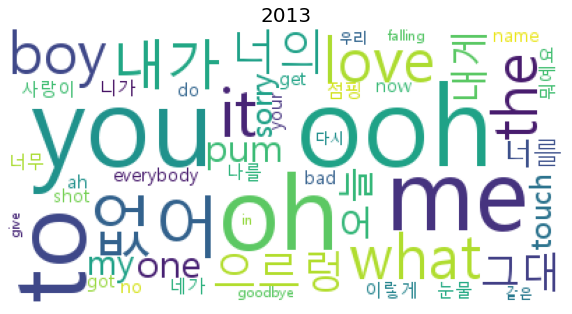

[('eh', 88), ('you', 87), ('너를', 77), ('love', 72), ('my', 56), ('너의', 54), ('mr', 54), ('나의', 52), ('oh', 52), ('내가', 50), ('come', 47), ('baby', 47), ('it', 46), ('너무', 44), ('우리', 40), ('나를', 37), ('너와', 35), ('지금', 33), ('body', 32), ('so', 29), ('모든', 28), ('눈을', 27), ('내게', 27), ('니가', 27), ('me', 27), ('없어', 26), ('나는', 25), ('이건', 25), ('her', 25), ('dat', 25), ('네가', 24), ('사랑', 24), ('hey', 24), ('uh', 24), ('말고', 23), ('너는', 23), ('사랑을', 23), ('소리', 22), ('be', 22), ('goodbye', 22), ('re', 20), ('없는', 20), ('사랑해', 20), ('다시', 20), ('사랑이', 20), ('the', 20), ('이제', 19), ('정말', 19), ('back', 19), ('있어', 19)]


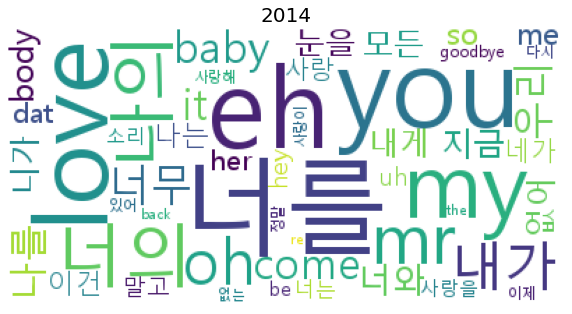

[('you', 191), ('me', 117), ('it', 102), ('baby', 80), ('oh', 77), ('that', 64), ('shake', 59), ('yeah', 57), ('booty', 57), ('없어', 46), ('girl', 46), ('너무', 46), ('아예', 44), ('미친', 44), ('and', 44), ('we', 41), ('let', 37), ('내가', 37), ('나를', 35), ('love', 35), ('bang', 32), ('the', 32), ('need', 32), ('내게', 32), ('la', 32), ('다시', 31), ('너의', 31), ('go', 29), ('나도', 29), ('get', 28), ('우리', 28), ('my', 28), ('이렇게', 27), ('그냥', 27), ('다른', 27), ('like', 26), ('것처럼', 25), ('자꾸', 25), ('call', 25), ('if', 25), ('party', 24), ('지금', 23), ('hey', 23), ('너를', 22), ('이제', 22), ('말고', 22), ('어쩌면', 21), ('수가', 21), ('tu', 21), ('않아', 20)]


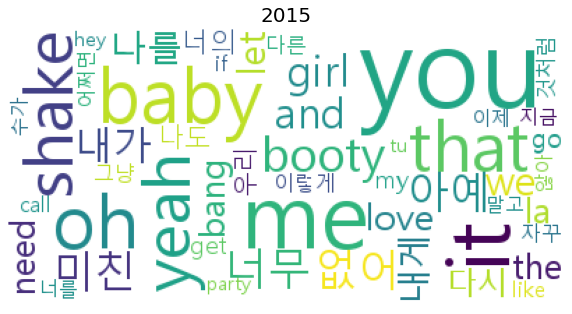

[('you', 120), ('ooh', 98), ('na', 84), ('내가', 65), ('너의', 65), ('baby', 51), ('up', 49), ('me', 49), ('많이', 47), ('my', 40), ('la', 40), ('않아', 39), ('like', 38), ('so', 38), ('나를', 34), ('없는', 34), ('없어', 32), ('yeah', 32), ('love', 28), ('oh', 28), ('shut', 28), ('자꾸', 27), ('너무', 27), ('있어', 27), ('우리', 27), ('나는', 27), ('don', 26), ('다시', 26), ('it', 25), ('거야', 25), ('모든', 25), ('on', 24), ('day', 23), ('이젠', 22), ('너를', 22), ('나의', 22), ('니가', 21), ('우린', 21), ('이렇게', 21), ('다른', 20), ('지금', 20), ('뭔데', 20), ('can', 20), ('wherever', 20), ('내게', 19), ('fire', 19), ('이미', 19), ('네가', 19), ('맘을', 18), ('싶어', 18)]


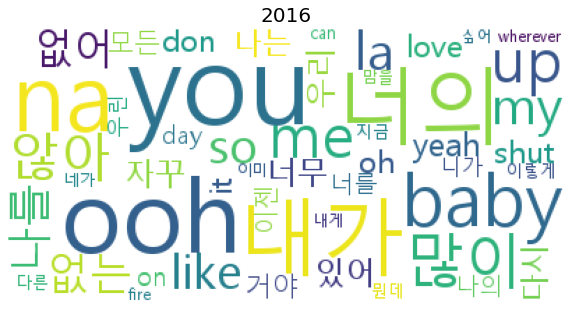

[('knock', 134), ('you', 83), ('rookie', 66), ('my', 65), ('really', 59), ('너의', 58), ('너를', 50), ('내가', 49), ('me', 48), ('love', 45), ('같아', 44), ('나를', 41), ('다시', 41), ('on', 39), ('we', 39), ('it', 37), ('baby', 37), ('new', 34), ('않아', 32), ('네가', 30), ('우리', 28), ('나의', 28), ('know', 28), ('yeah', 28), ('거야', 28), ('정말', 28), ('보내', 28), ('있어', 27), ('이렇게', 27), ('모르겠다', 27), ('나는', 26), ('자꾸', 26), ('wanna', 26), ('good', 26), ('우린', 25), ('너무', 25), ('에라', 25), ('face', 25), ('매일', 24), ('그대', 24), ('없어', 24), ('찌릿', 24), ('지금', 23), ('like', 23), ('내게', 23), ('맘을', 23), ('life', 23), ('것처럼', 23), ('all', 23), ('말을', 22)]


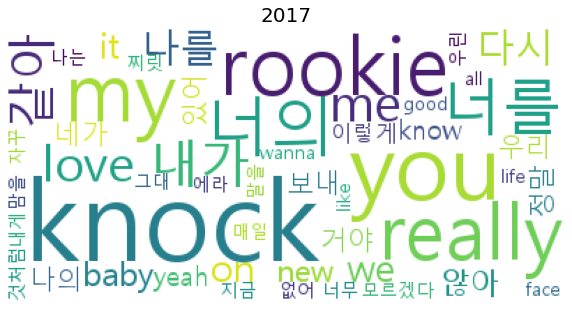

[('you', 123), ('love', 113), ('it', 85), ('know', 75), ('me', 72), ('oh', 68), ('what', 61), ('so', 59), ('let', 52), ('wanna', 52), ('the', 51), ('내가', 49), ('don', 46), ('너를', 43), ('ah', 43), ('my', 41), ('너의', 40), ('ya', 40), ('너와', 37), ('night', 36), ('나를', 33), ('없는', 33), ('거야', 33), ('we', 32), ('네가', 31), ('그리고', 31), ('나는', 29), ('woo', 29), ('다음', 29), ('with', 28), ('bye', 28), ('go', 28), ('everyday', 28), ('우리', 27), ('just', 27), ('that', 27), ('away', 27), ('baby', 27), ('yeah', 27), ('나의', 25), ('모든', 25), ('같아', 25), ('ooh', 25), ('every', 25), ('있는', 24), ('없어', 24), ('dance', 24), ('day', 24), ('like', 23), ('마음', 22)]


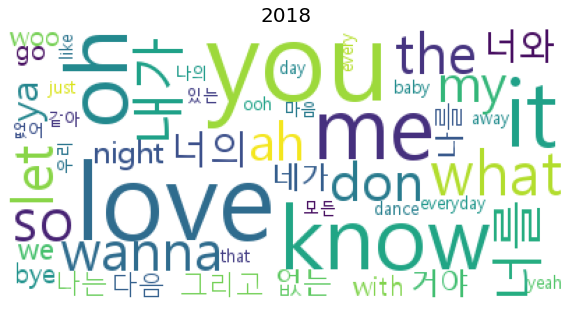

[('you', 91), ('너를', 69), ('my', 60), ('우리', 59), ('twit', 56), ('내가', 52), ('없는', 49), ('it', 43), ('fire', 43), ('나는', 40), ('네가', 40), ('지금', 33), ('me', 32), ('너는', 32), ('너의', 31), ('love', 31), ('don', 31), ('up', 31), ('싶어', 30), ('이젠', 30), ('lo', 30), ('yes', 30), ('다시', 28), ('없어', 28), ('oh', 28), ('너무', 26), ('모든', 25), ('나의', 24), ('그때', 24), ('너와', 24), ('이렇게', 22), ('know', 21), ('달라', 21), ('아직', 20), ('have', 20), ('still', 20), ('내게', 19), ('이제', 19), ('yeah', 18), ('like', 18), ('the', 18), ('to', 18), ('fancy', 18), ('않아', 17), ('나를', 16), ('니가', 16), ('fly', 16), ('정말', 16), ('없이', 15), ('그대를', 15)]


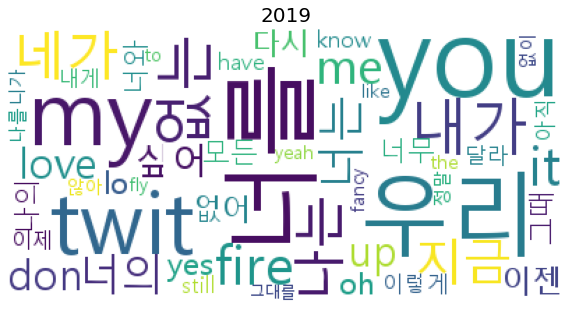

In [6]:
# 한글자 빼기
for i in range(10):
    df=pd.read_csv(f'{2010+i}.csv',encoding='utf-8')
    result = []
    for gasa in df['가사']:  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
        # 특수문자 제거
        special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
        for char in special_chr:
            gasa = str(gasa).replace(char, " " )

        # 공백을 기준으로 문자열 나누기
        temp = gasa.split( " " )    # 공백으로 나누기
        for _str in temp:   # 반복문을 이용하여서 단어 하나씩 꺼내어 본다.
            if _str != "" and len(_str)!=1 :  # 공백("")이 아닐 경우, 두글자 이상
                result.append( _str.lower() )    # 최종적으로 result 변수에 분류된 가사들을 넣는다.
    
    counts = Counter(result)
    tags = counts.most_common(50)
    print(tags)

    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path, background_color="white", max_font_size=80)
    cloud = wc.generate_from_frequencies(dict(tags))
    
    plt.figure(figsize=(10, 8))
    plt.title(f'{2010+i}',fontsize=20)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
